<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto


<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<center><h1 style="color: #011f4b;">PRIMER ANALISIS Y DESCRIPCION DE LA SERIE</h1></center>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [5]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [6]:
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [7]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [8]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [9]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() 
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [10]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [11]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

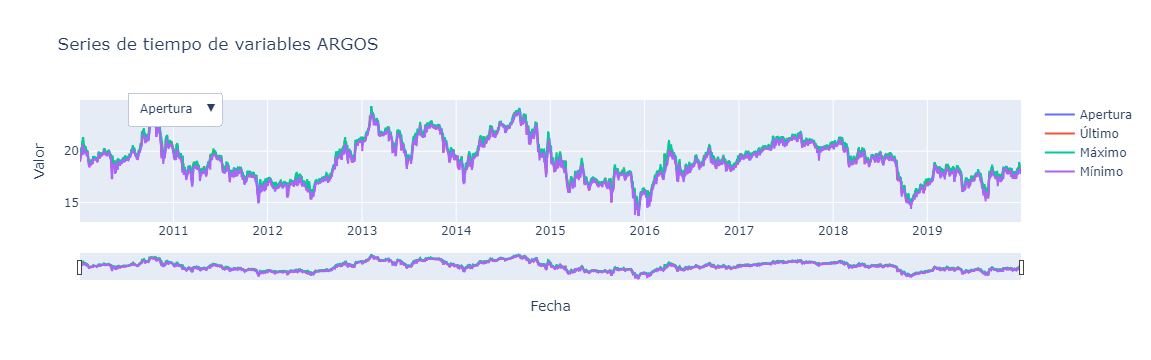

In [12]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

In [13]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

<h2 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h2>

In [14]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [15]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.17071798004770206
[3.82402513 3.86880216 3.86026874 ... 3.7476868  3.7476868  3.76211352]


In [16]:
Serie_log = np.log(Apertura)
print(Serie_log)

Fecha
2010-01-04    2.943386
2010-01-05    2.970414
2010-01-06    2.965273
2010-01-07    2.980619
2010-01-08    2.980619
                ...   
2019-12-26    2.903617
2019-12-27    2.897016
2019-12-28    2.897016
2019-12-29    2.897016
2019-12-30    2.905808
Length: 3648, dtype: float64


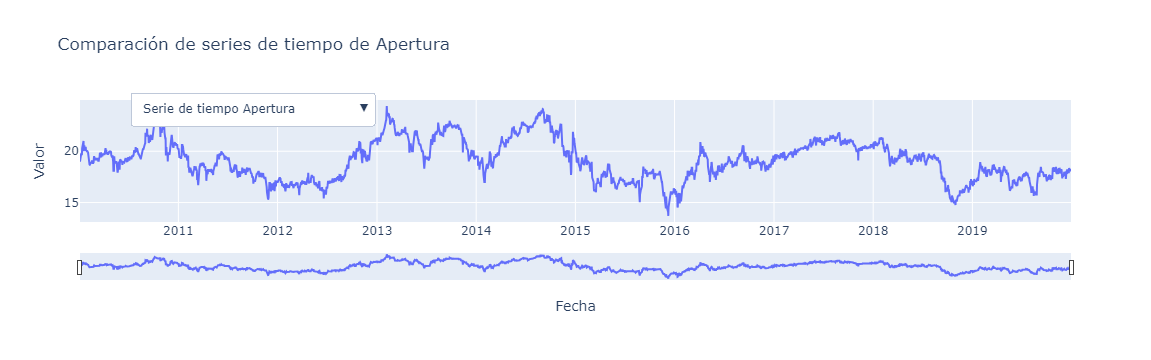

In [17]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=Serie_log, mode='lines', name='Serie de tiempo Apertura-Log', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, True , True]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True, False]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}]),
                 dict(label="Serie de tiempo Apertura-Log",
                     method="update",
                     args=[{"visible": [False, False, True]},
                           {"title": "Serie de tiempo Apertura-Log"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

In [18]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">DIFERENCIA ORDINARA</h3>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [20]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(serie_boxcox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(serie_boxcox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9913023479244938
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1844961312688524
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


In [21]:
# Serie Diferenciada
Diff_BoxCox = np.diff(serie_boxcox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.41941538842336
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


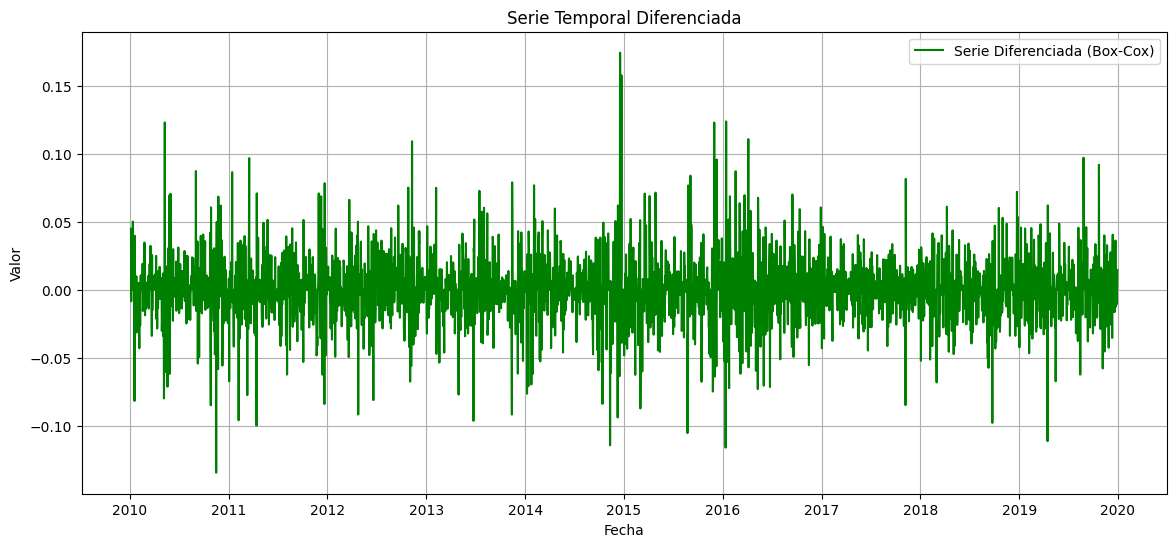

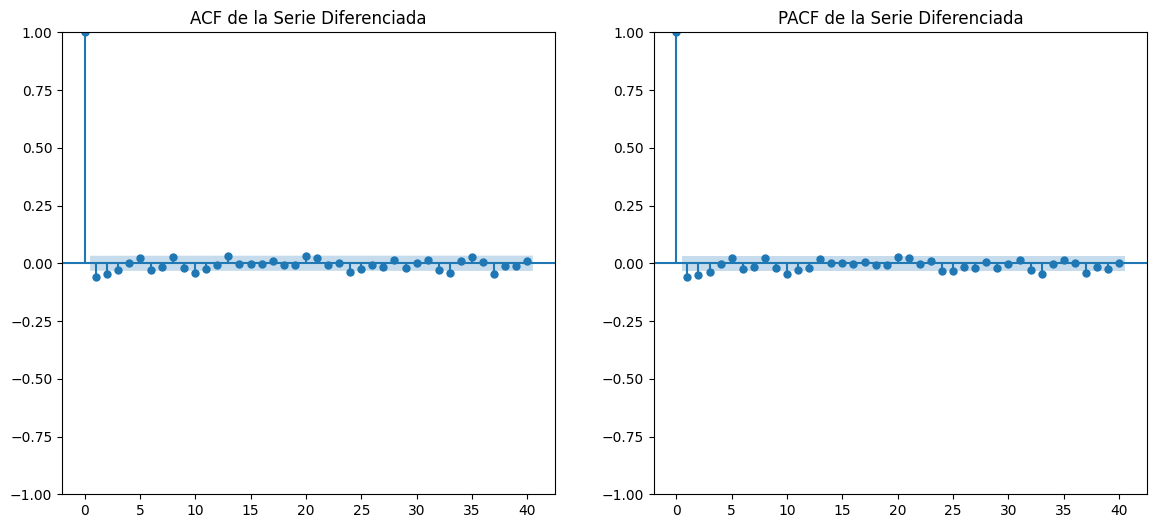

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df1 = pd.DataFrame({'Fecha': ARGOS['Fecha'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff_df1['Fecha'], diff_df1['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

In [23]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(Serie_log, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(Serie_log, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9912286866890665
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1967965538031886
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


In [24]:
# Serie Diferenciada
Diff_log = np.diff(Serie_log, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_log, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_log, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.422470606989098
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


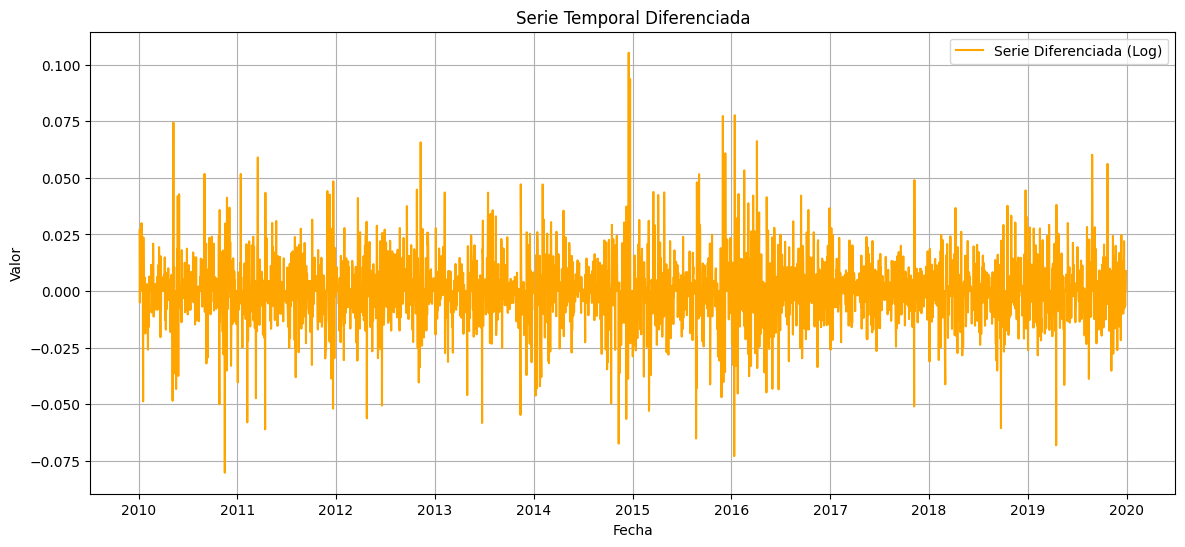

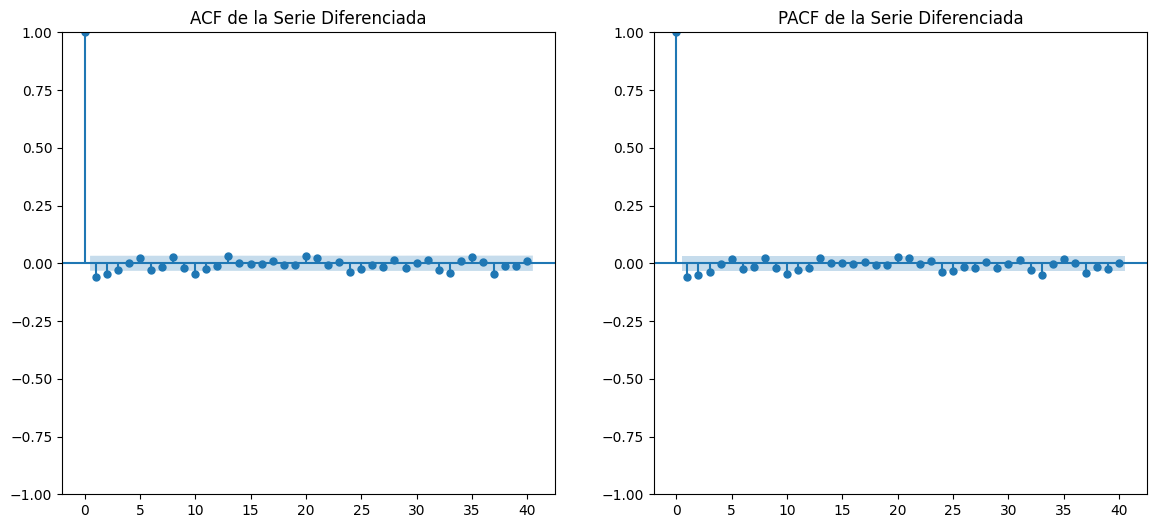

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df2 = pd.DataFrame({'Fecha': ARGOS['Fecha'][1:], 'Diff_log': Diff_log})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff_df2['Fecha'], diff_df2['Diff_log'], label='Serie Diferenciada (Log)', color='orange')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(Diff_log, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_log, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

In [26]:
diff_df1.info()
print(diff_df1.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 1 to 3647
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        3647 non-null   datetime64[ns]
 1   Diff_BoxCox  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 KB
       Fecha  Diff_BoxCox
1 2010-01-05     0.044777
2 2010-01-06    -0.008533
3 2010-01-07     0.025492
4 2010-01-08     0.000000
5 2010-01-09     0.000000


In [27]:
diff_df2.info()
print(diff_df2.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3647 entries, 1 to 3647
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3647 non-null   datetime64[ns]
 1   Diff_log  3647 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.1 KB
       Fecha  Diff_log
1 2010-01-05  0.027029
2 2010-01-06 -0.005141
3 2010-01-07  0.015346
4 2010-01-08  0.000000
5 2010-01-09  0.000000


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

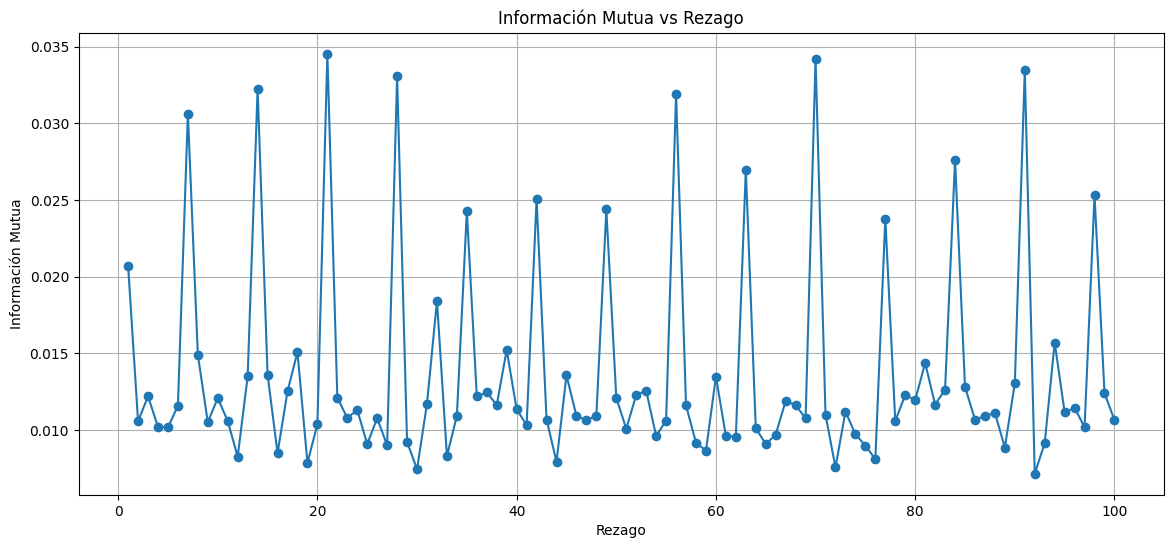

In [29]:
# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        diff_df1['Diff_BoxCox'].iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        diff_df1['Diff_BoxCox'].iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [30]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 7, 8, 14, 18, 21, 28, 32, 35, 39, 42, 49, 56, 63, 70, 77, 81, 84, 91, 94, 98]


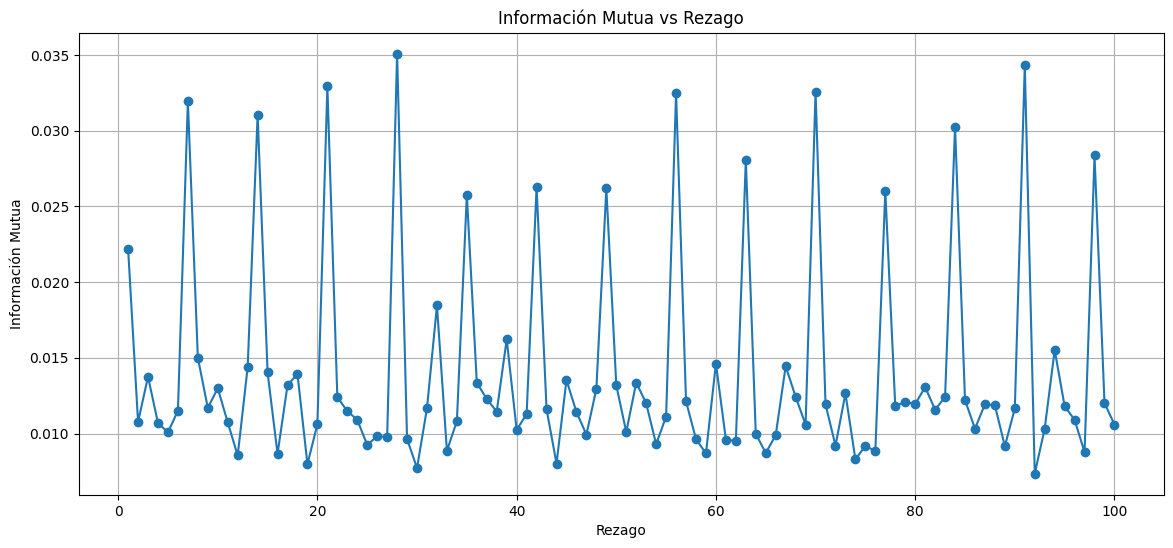

In [31]:
# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        diff_df2['Diff_log'].iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        diff_df2['Diff_log'].iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [32]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 7, 8, 13, 14, 15, 21, 28, 32, 35, 39, 42, 49, 56, 60, 63, 67, 70, 77, 84, 91, 94, 98]


Se puede concluir después de haber probado ambos caminos en referencia a empezar desde la Serie Original o desde la Serie transformada vía BoxCox y luego eliminando la tendencia vía regresión Kernel, que el modelo que mejor ajusto de estos 2 fue el 2do, cosa que además podemos visualizar de una forma más numérica comparando el MSE obtenido de ambos modelos tanto para los conjuntos de prueba como entrenamiento en el cual el modelo de la serie sin tendencia supero o en otras palabras el MSE fue menor en este. 

Sin embargo, aún no estamos seguros de que el modelo de árboles sea la mejor opción para modelar nuestra serie, por eso a continuación se muestran otros modelos. 

<center><h1 style="color: #011f4b;">PRONOSTICO BASADO EN LA DESCOMPOSICION </h1></center>

<h2 style="color: #011f4b;">PRONOSTICO BASADO EN DESCOMPOSICION CON SimpleExpSmoothing</h2>

In [43]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

In [64]:
#diff_df2['Diff_log']
serie_boxcox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': serie_boxcox})

In [65]:
# Suavizamiento Exponencial Simple (SES)
# Suponiendo que diff_df2['Diff_log'] contiene la serie diferenciada transformada
serie = serie_boxcox['BoxCox']

# Definimos TimeSeriesSplit con 5 divisiones
tscv = TimeSeriesSplit(n_splits=5)

# Lista para almacenar los errores en cada iteración
mse_scores = []

# Bucle a través de las divisiones de validación cruzada
for train_index, test_index in tscv.split(serie):
    # División de los datos en entrenamiento y prueba
    train, test = serie.iloc[train_index], serie.iloc[test_index]
    
    # Ajustar el modelo SES en los datos de entrenamiento
    ses_model = SimpleExpSmoothing(train)
    ses_fit = ses_model.fit(optimized=True)
    
    # Hacer la predicción en el conjunto de prueba
    ses_forecast = ses_fit.forecast(len(test))
    
    # Calcular el error MSE (Mean Squared Error)
    mse = mean_squared_error(test, ses_forecast)
    mse_scores.append(mse)

# Mostrar los resultados
print(f'MSE en cada split: {mse_scores}')
print(f'MSE promedio: {np.mean(mse_scores)}')

MSE en cada split: [0.036409735253418264, 0.01511043335558527, 0.0711100726996225, 0.00680218162280489, 0.05854155069059911]
MSE promedio: 0.03759479472440601


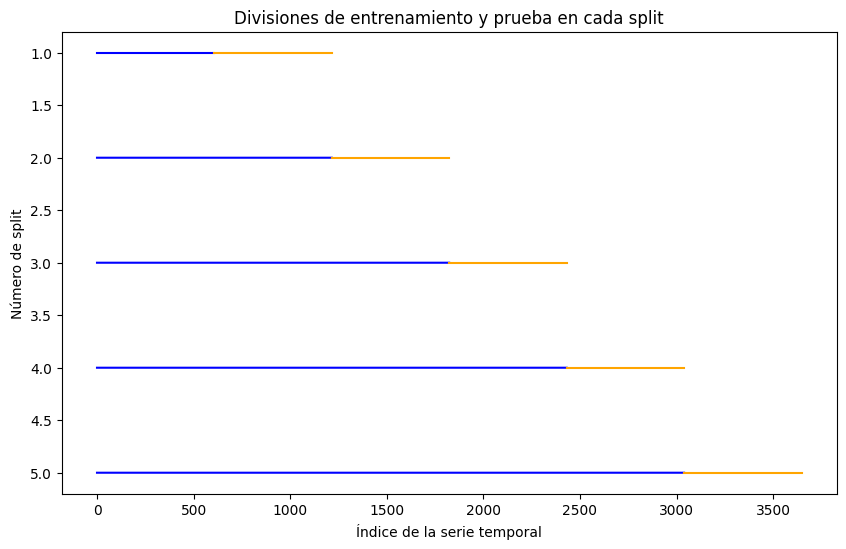

In [66]:
import matplotlib.pyplot as plt

# Visualizar los splits de TimeSeriesSplit
def plot_splits(serie, tscv):
    plt.figure(figsize=(10, 6))
    
    # Bucle sobre cada split
    for i, (train_index, test_index) in enumerate(tscv.split(serie)):
        plt.plot(train_index, [i + 1] * len(train_index), label=f"Train {i+1}", color="blue")
        plt.plot(test_index, [i + 1] * len(test_index), label=f"Test {i+1}", color="orange")
    
    plt.gca().invert_yaxis()
    plt.title("Divisiones de entrenamiento y prueba en cada split")
    plt.xlabel("Índice de la serie temporal")
    plt.ylabel("Número de split")
    plt.show()

# Llamar a la función
plot_splits(serie, tscv)


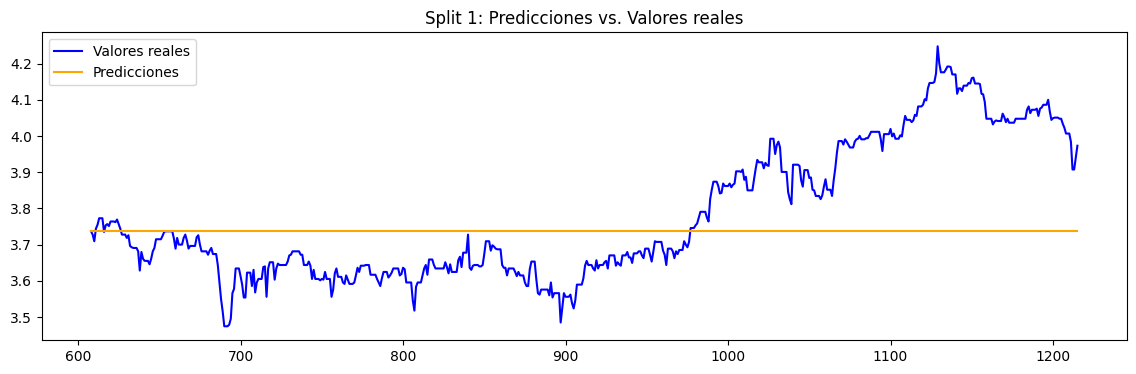

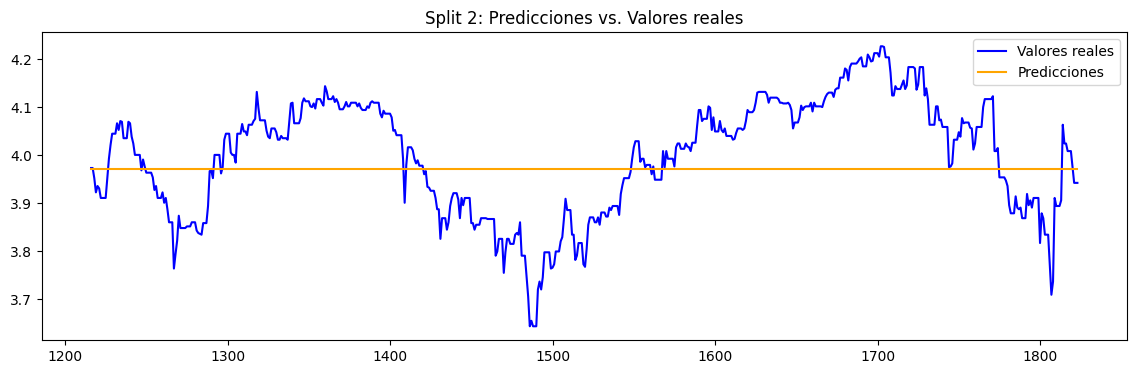

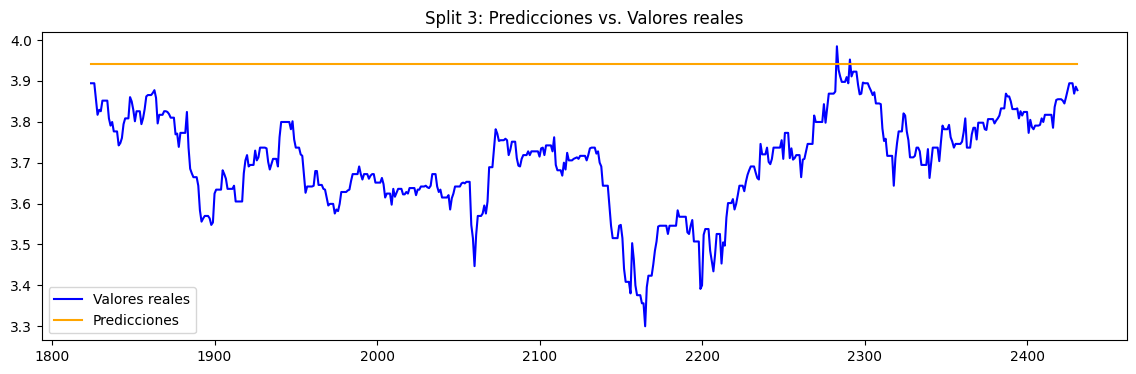

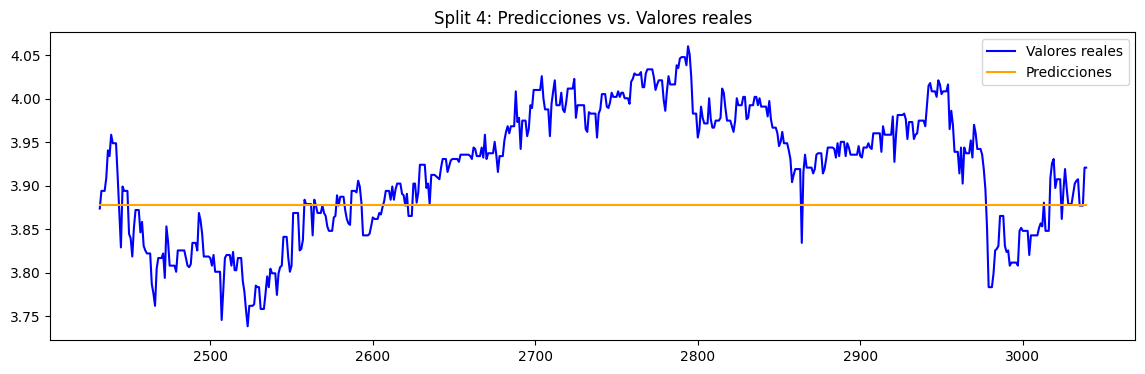

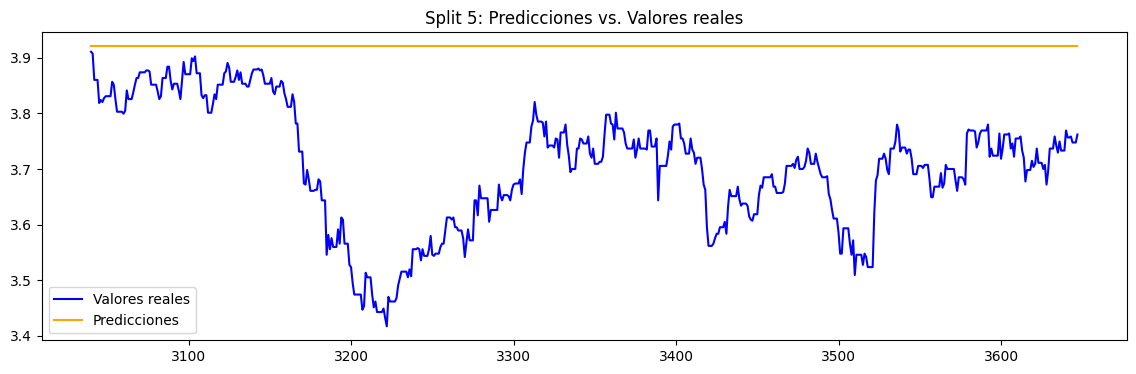

In [67]:
# Bucle a través de los splits de validación cruzada y graficar predicciones vs realidad
for i, (train_index, test_index) in enumerate(tscv.split(serie)):
    # División de los datos en entrenamiento y prueba
    train, test = serie.iloc[train_index], serie.iloc[test_index]
    
    # Ajustar el modelo SES en los datos de entrenamiento
    ses_model = SimpleExpSmoothing(train)
    ses_fit = ses_model.fit(optimized=True)
    
    # Hacer la predicción en el conjunto de prueba
    ses_forecast = ses_fit.forecast(len(test))
    
    # Graficar los resultados
    plt.figure(figsize=(14, 4))
    plt.plot(test.index, test, label="Valores reales", color="blue")
    plt.plot(test.index, ses_forecast, label="Predicciones", color="orange")
    plt.title(f"Split {i+1}: Predicciones vs. Valores reales")
    plt.legend()
    plt.show()


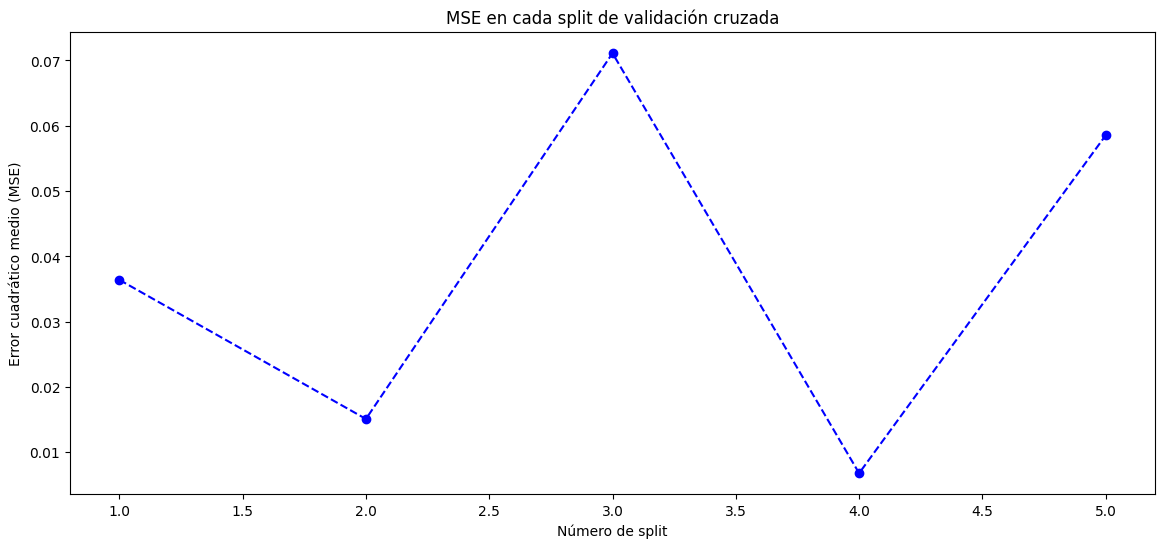

In [68]:
# Graficar el MSE en cada split
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='--', color='b')
plt.title("MSE en cada split de validación cruzada")
plt.xlabel("Número de split")
plt.ylabel("Error cuadrático medio (MSE)")
plt.show()


<h2 style="color: #011f4b;">PRONOSTICO BASADO EN DESCOMPOSICION CON ExponentialSmoothing </h2>

In [69]:
# Definimos TimeSeriesSplit con 5 divisiones
tscv = TimeSeriesSplit(n_splits=5)

# Lista para almacenar los errores en cada iteración
mse_scores = []

# Bucle a través de las divisiones de validación cruzada
for train_index, test_index in tscv.split(serie):
    # División de los datos en entrenamiento y prueba
    train, test = serie.iloc[train_index], serie.iloc[test_index]
    
    # Ajustar el modelo de Holt-Winters
    hw_model = ExponentialSmoothing(train, seasonal_periods=7, trend='add', seasonal='add')
    hw_fit = hw_model.fit(optimized=True)
    
    # Hacer la predicción en el conjunto de prueba
    hw_forecast = hw_fit.forecast(len(test))
    
    # Calcular el error MSE (Mean Squared Error)
    mse = mean_squared_error(test, hw_forecast)
    mse_scores.append(mse)

# Mostrar los resultados
print(f'MSE en cada split: {mse_scores}')
print(f'MSE promedio: {np.mean(mse_scores)}')

MSE en cada split: [0.05099185321116271, 0.013756446055634924, 0.08069145494169462, 0.005919778290435959, 0.06445971074558114]
MSE promedio: 0.04316384864890187


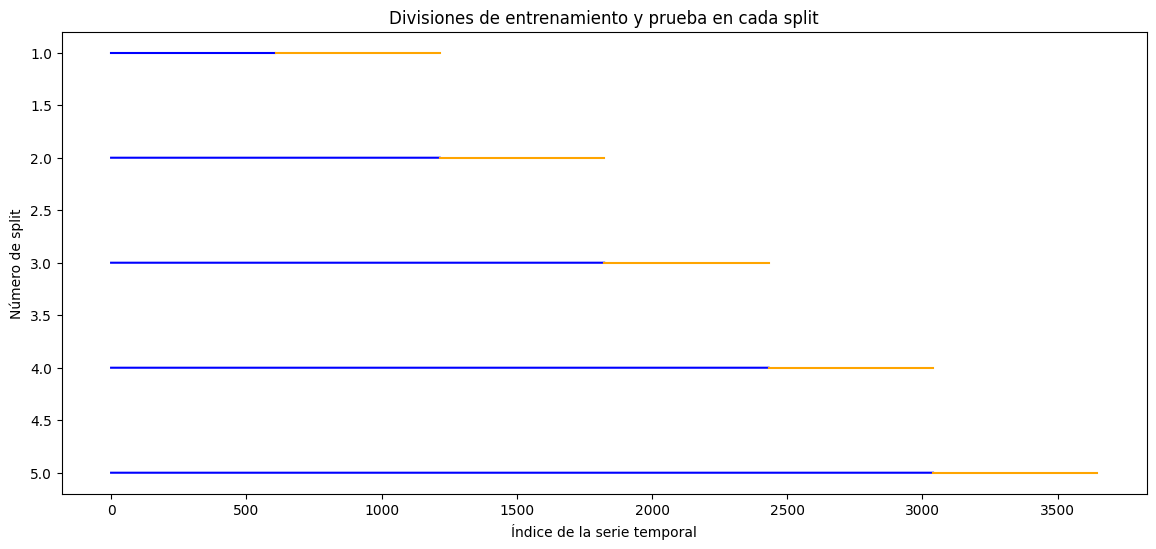

In [70]:
def plot_splits(serie, tscv):
    plt.figure(figsize=(14, 6))
    
    for i, (train_index, test_index) in enumerate(tscv.split(serie)):
        plt.plot(train_index, [i + 1] * len(train_index), label=f"Train {i+1}", color="blue")
        plt.plot(test_index, [i + 1] * len(test_index), label=f"Test {i+1}", color="orange")
    
    plt.gca().invert_yaxis()
    plt.title("Divisiones de entrenamiento y prueba en cada split")
    plt.xlabel("Índice de la serie temporal")
    plt.ylabel("Número de split")
    plt.show()

plot_splits(serie, tscv)


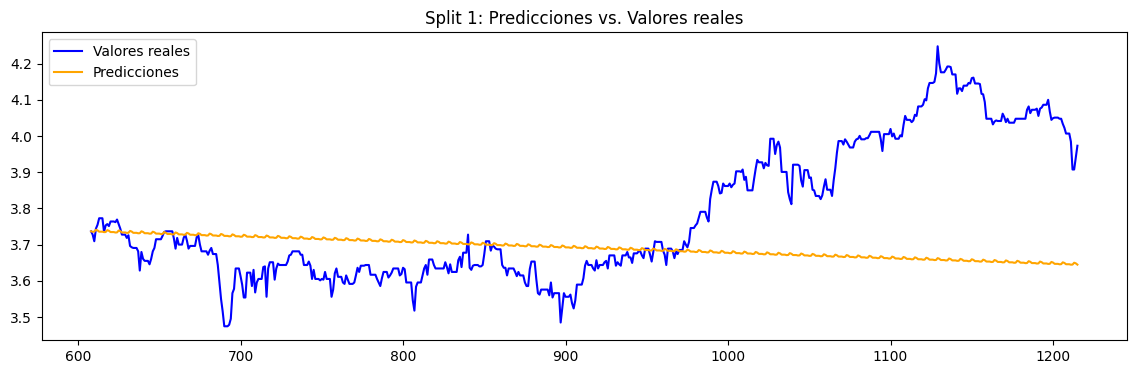

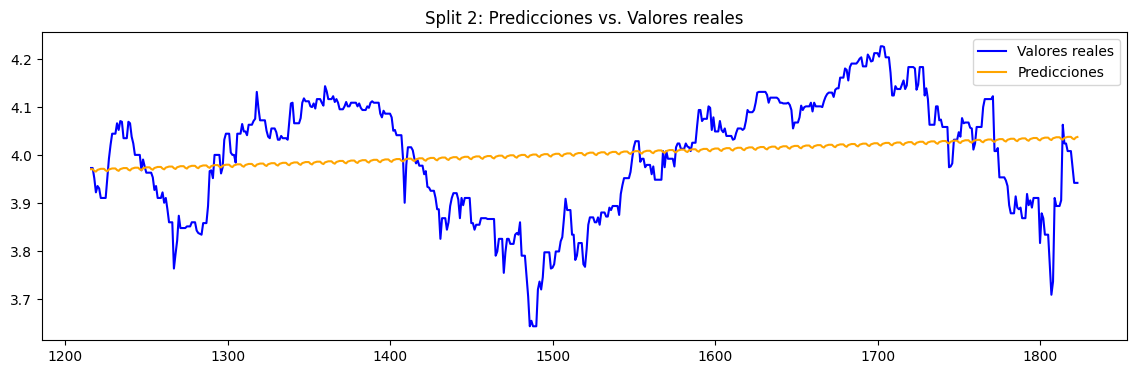

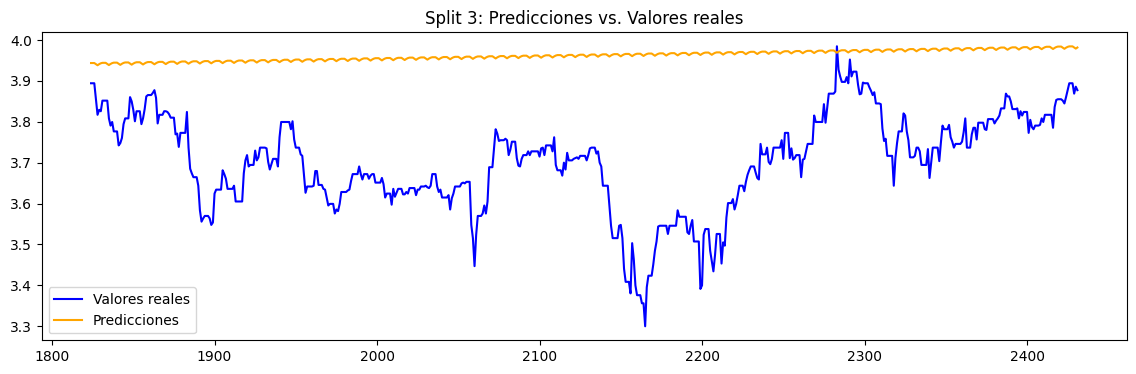

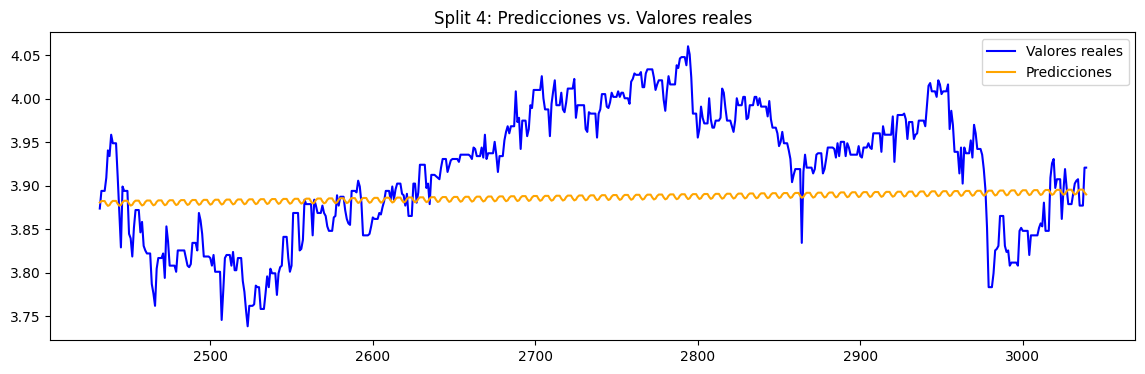

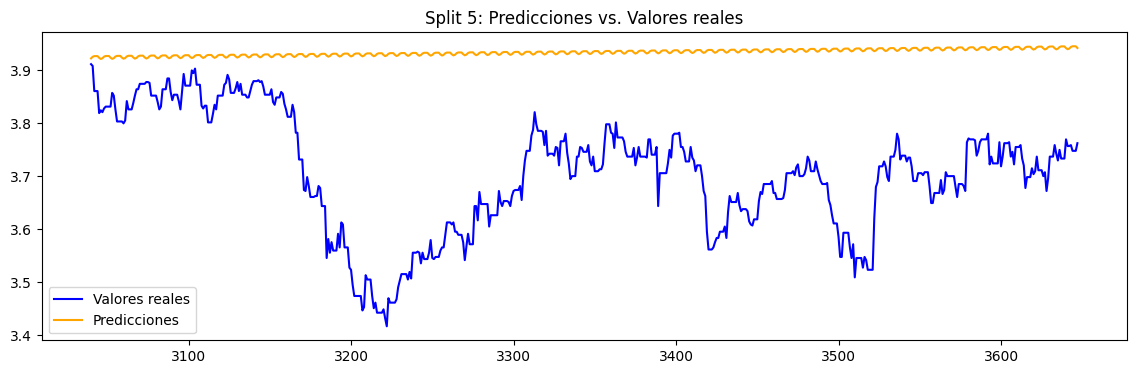

In [74]:
# Bucle a través de los splits de validación cruzada y graficar predicciones vs realidad
for i, (train_index, test_index) in enumerate(tscv.split(serie)):
    # División de los datos en entrenamiento y prueba
    train, test = serie.iloc[train_index], serie.iloc[test_index]
    
    # Ajustar el modelo de Holt-Winters
    hw_model = ExponentialSmoothing(train, seasonal_periods=7, trend='add', seasonal='add')
    hw_fit = hw_model.fit(optimized=True)
    
    # Hacer la predicción en el conjunto de prueba
    hw_forecast = hw_fit.forecast(len(test))
    
    # Graficar los resultados
    plt.figure(figsize=(14, 4))
    plt.plot(test.index, test, label="Valores reales", color="blue")
    plt.plot(test.index, hw_forecast, label="Predicciones", color="orange")
    plt.title(f"Split {i+1}: Predicciones vs. Valores reales")
    plt.legend()
    plt.show()

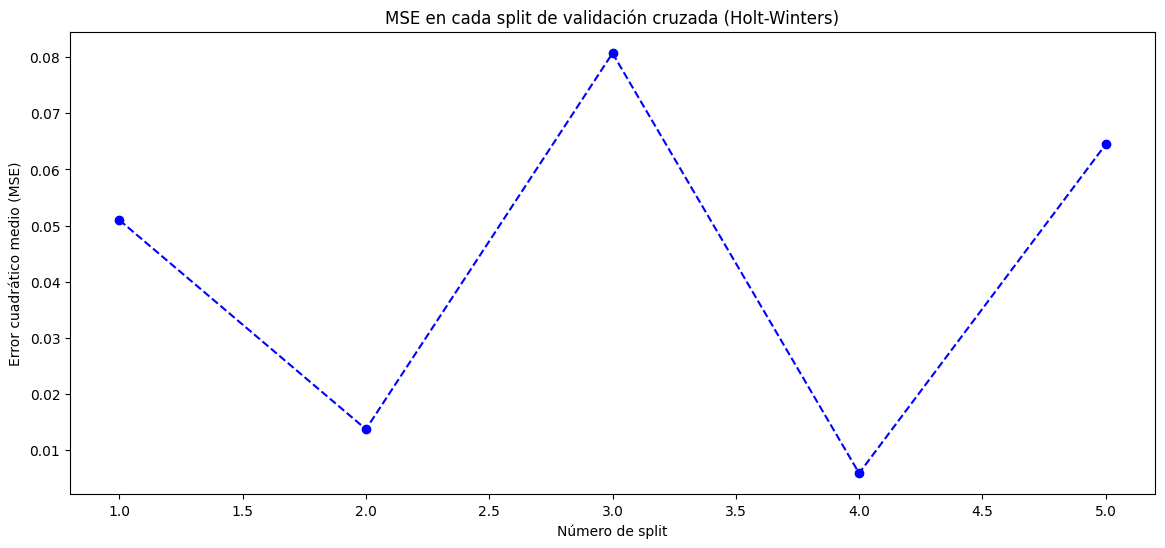

In [72]:
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', linestyle='--', color='b')
plt.title("MSE en cada split de validación cruzada (Holt-Winters)")
plt.xlabel("Número de split")
plt.ylabel("Error cuadrático medio (MSE)")
plt.show()